In [1]:
!kaggle competitions download -c nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
train = pd.read_csv('nlp-getting-started/train.csv')
test = pd.read_csv('nlp-getting-started/test.csv')
train.head()


id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

- Îç∞Ïù¥ÌÑ∞Îäî id, keyword, location, text, target Îì± Ï¥ù 5Í∞ú Î≥ÄÏàòÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
- id - Í∞Å Ìä∏ÏúÑÌÑ∞ Îç∞Ïù¥ÌÑ∞Ïùò ÏãùÎ≥ÑÏûê
- keyword - Ìï¥Îãπ Ìä∏ÏúóÏùò ÌäπÏ†ï ÌÇ§ÏõåÎìú
- location - Ìä∏ÏúÑÌÑ∞Í∞Ä ÏûëÏÑ±Îêú Ïû•ÏÜå
- text - Ïã§Ï†ú Ìä∏ÏúóÏùò Î©îÏãúÏßÄ
- target - Ìä∏ÏúÑÌÑ∞Í∞Ä Ïã§Ï†úÎ°ú Ïû¨ÎÇúÏù¥ÎùºÎ©¥ 1, Í∞ÄÏßúÎùºÎ©¥ 0ÏúºÎ°ú ÌëúÏãú

In [3]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


- test Îç∞Ïù¥ÌÑ∞Ïóê target Î≥ÄÏàò Î™ÖÏù¥ ÏóÜÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

## ÌÉêÏÉâÏ†Å ÏûêÎ£å Î∂ÑÏÑù

<ipython-input-4-68b5ad668110>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


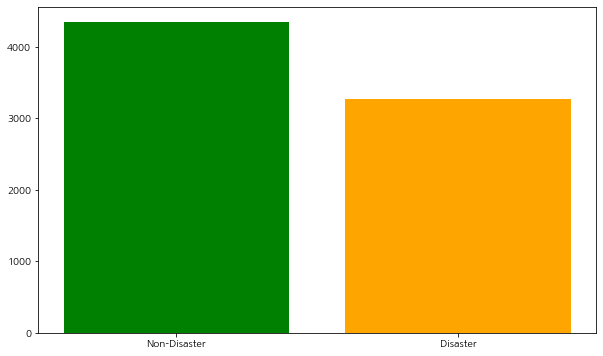

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
news_class = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, news_class, color=['green', 'orange'])

fig.show()

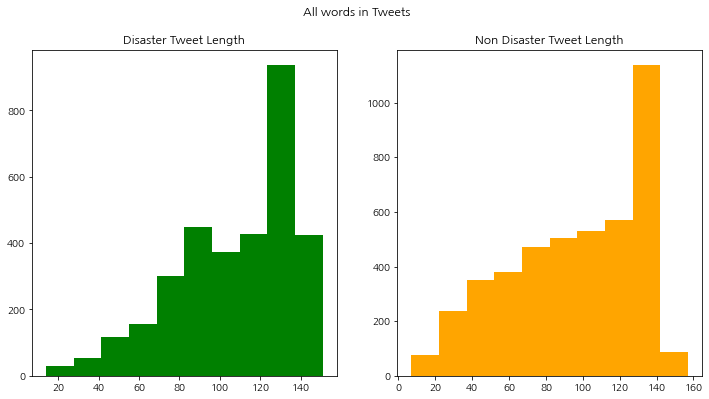

In [5]:
# Ìä∏Ïúó Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color='green')
ax[0].set_title('Disaster Tweet Length')

ax[1].hist(non_disaster_tweet_len, color='orange')
ax[1].set_title('Non Disaster Tweet Length')

fig.suptitle('All words in Tweets')
plt.show()

- Í∏∏Ïù¥Í∞Ä 140 Ïù¥ÌõÑ Non DisasterÎäî Í∏âÍ≤©ÌïòÍ≤å Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏

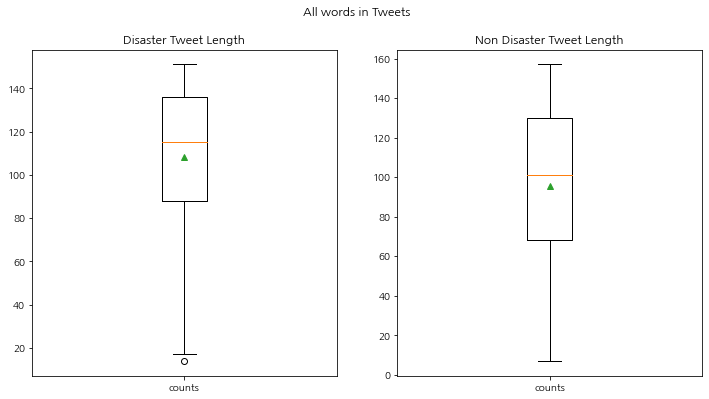

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(disaster_tweet_len, labels=['counts'], showmeans=True)
ax[0].set_title('Disaster Tweet Length')

ax[1].boxplot(non_disaster_tweet_len, labels=['counts'], showmeans=True)
ax[1].set_title('Non Disaster Tweet Length')

fig.suptitle('All words in Tweets')
plt.show()


- Îëê Îç∞Ïù¥ÌÑ∞ Î™®Îëê Ï§ëÍ∞ÑÍ∞íÎ≥¥Îã§ ÏûëÏùÄ Í∞íÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

In [7]:
## Numpy ÌôúÏö©
import numpy as np

disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

print('Max Length of Disaster Tweet: {}'.format(np.max(disaster_tweet_len)))
print('Min Length of Disaster Tweet: {}'.format(np.min(disaster_tweet_len)))
print('Mean Length of Disaster Tweet: {}'.format(np.mean(disaster_tweet_len)))
print('Median Length of Disaster Tweet: {}'.format(np.median(disaster_tweet_len)))

print('Max Length of Non Disaster Tweet: {}'.format(np.max(non_disaster_tweet_len)))
print('Min Length of Non Disaster Tweet: {}'.format(np.min(non_disaster_tweet_len)))
print('Mean Length of Non Disaster Tweet: {}'.format(np.mean(non_disaster_tweet_len)))
print('Median Length of Non Disaster Tweet: {}'.format(np.median(non_disaster_tweet_len)))

Max Length of Disaster Tweet: 151
Min Length of Disaster Tweet: 14
Mean Length of Disaster Tweet: 108.11342097217977
Median Length of Disaster Tweet: 115.0
Max Length of Non Disaster Tweet: 157
Min Length of Non Disaster Tweet: 7
Mean Length of Non Disaster Tweet: 95.70681713496084
Median Length of Non Disaster Tweet: 101.0


<ipython-input-8-cdc058eae20e>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


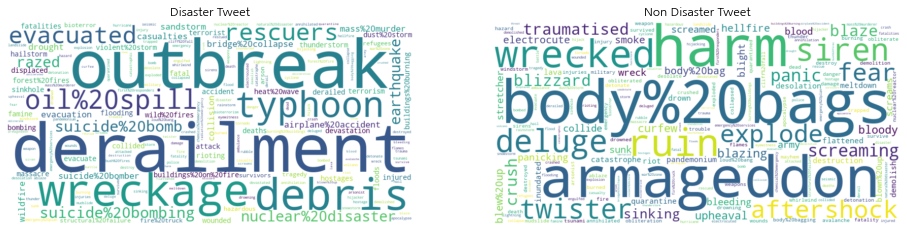

In [8]:
## wordcloud ÌôúÏö©
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords=set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').\
    generate_from_frequencies(disaster_tweet_keywords)

non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').\
    generate_from_frequencies(non_disaster_tweet_keywords)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Disaster Tweet')

ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Non Disaster Tweet')

fig.show()

- Disaster Ìä∏ÏúóÏùÄ Derailment(ÌÉàÏÑ†), Outbreak(Ïñ¥Îñ§ ÏÇ¨Í±¥Ïùò Î∞úÏÉù), Wreckage(ÎÇúÌåå), Typhoon(ÌÉúÌíç) Îì±
     Î™ÖÏÇ¨ ÌïòÎÇòÎ°úÎèÑ Ï∂©Î∂ÑÌïòÍ≤å ÏÑ§Î™ÖÎêòÎäî ÏßÑÏßú Ïû¨ÎÇú Îâ¥Ïä§Ïù∏ Î∞òÎ©¥
- Non Disaster Ìä∏ÏúóÏùÄ Î™ÖÏÇ¨Î≥¥Îã® ÌòïÏö©ÏÇ¨ÎÇò ÎèôÏÇ¨Í∞Ä Ï£ºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

## ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ

In [9]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
import pandas as pd
def check_na(data):
    isnull_na = (data.isnull().sum()/len(data))*100
    data_na = isnull_na.drop(isnull_na[isnull_na==0].index).sort_values(ascending=False)
    missing_data=pd.DataFrame({'Missing Ratio': data_na,
                                'Data Type': data.dtypes[data_na.index]})
    print('Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüºÍ≥º Í±¥Ïàò:\n', missing_data)

check_na(train)
check_na(test)

Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüºÍ≥º Í±¥Ïàò:
           Missing Ratio Data Type
location      33.272035    object
keyword        0.801261    object
Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏπºÎüºÍ≥º Í±¥Ïàò:
           Missing Ratio Data Type
location      33.864542    object
keyword        0.796813    object


- ÎèÖÎ¶Ω Î≥ÄÏàòÎ°ú ÌôúÏö©Ìï† text Î≥ÄÏàòÏóêÎäî Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

In [10]:
# test_idÎßå Îî∞Î°ú Ï∂îÏ∂úÌï¥ Ï†ÄÏû•
test_id = test['id']
for datas in [train, test]:
    datas = datas.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
    
train.shape, test.shape

((7613, 2), (3263, 1))

### Text Cleansing
- HTML ÌÉúÍ∑∏ Ï†úÍ±∞
- ÌäπÏàòÎ¨∏Ïûê Í≥µÎ∞±ÏúºÎ°ú Î∞îÍæ∏Í∏∞
- ÎåÄÎ¨∏Ïûê ÏÜåÎ¨∏ÏûêÎ°ú Î∞îÍæº ÌõÑ, Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§Í∏∞
- Î∂àÏö©Ïñ¥ Ï†úÍ±∞ÌïòÍ∏∞


In [11]:
# url Ï†úÍ±∞
# re.sub Î©îÏÜåÎìúÎ•º ÌôúÏö©ÌïòÏó¨ Í≥µÎ∞±ÏúºÎ°ú ÎßåÎì§Î©¥ Ï†úÍ±∞ Í∞ÄÎä•
import re


def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)


sample_text = "ÏÉàÎ°úÏö¥ Ï∫êÍ∏Ä ÎåÄÌöåÍ∞Ä Ïó¥Î†∏ÏäµÎãàÎã§. Ï£ºÏÜå: https://www.kaggle.com/c/nlp-getting-started"
remove_url(sample_text)


'ÏÉàÎ°úÏö¥ Ï∫êÍ∏Ä ÎåÄÌöåÍ∞Ä Ïó¥Î†∏ÏäµÎãàÎã§. Ï£ºÏÜå: '

In [12]:
# html Ï†úÍ±∞
'''
ÏùºÏ†ïÌïú ÌëúÌòÑÏãùÏóê Îî∞ÎùºÏÑú Ï†ïÍ∑ú ÌëúÌòÑÏãùÏùÑ ÏûëÏÑ±Ìï† Ïàò ÏûàÍ≥†, 
Ïù¥Î•º ÌôúÏö©Ìï¥ ÌäπÏ†ï Î¨∏ÏûêÏó¥Ïùò Ìå®ÌÑ¥ÏùÑ Ï∞æÏïÑÎÇ¥ÏÑú Ï†úÍ±∞ÌïòÎäî ÏõêÎ¶¨ÏûÖÎãàÎã§.
'''
def remove_html(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)


sample_text = """<div>
<h1> Real News or Fake News </h1>
<p> Kaggle Machine Learning </p>
</div>"""

print(remove_html(sample_text))



 Real News or Fake News 
 Kaggle Machine Learning 



In [13]:
!pip install emoji --upgrade

In [14]:
import emoji
print(emoji.emojize('Phd is very easy!!! :thumbs_up:'))


Phd is very easy!!! üëç


In [15]:
# ÏòÅÏñ¥Í∞Ä ÏïÑÎãå ÌäπÏàò Î¨∏ÏûêÎ•º Í≥µÎ∞±ÏúºÎ°ú Î∞îÍøà
def remove_emoji(text):
  emoji_pattern = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)


remove_emoji("Hello, üëç")


'Hello, '

In [16]:
# '#'ÏùÑ Ï†úÍ±∞ÌïòÎäîÏßÄ ÌôïÏù∏
def remove_punct(text):
  return re.sub("[^a-zA-Z]", " ", text)


sample_text = "Hello!, Can I have one question?.., Is it #Outbreak?"
remove_punct(sample_text)


'Hello   Can I have one question     Is it  Outbreak '

In [17]:
# NLTK
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

print("Total Length of stopwords:", len(stopwords.words('english')))
print(stopwords.words('english')[:10])


Total Length of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wkddn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Transformation Vectorizer

In [18]:
# Countvectorizer
'''
Í∞ÅÍ∞ÅÏùò ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†Ìï¥ Îã®ÏàúÌïòÍ≤å Î™á Î≤à ÎÇòÏôîÎäîÏßÄ Ïà´ÏûêÎ•º ÏÑ∏Îäî Í∞úÎÖê
JangwoonÏùÄ Ïù∏Îç±Ïä§Ïùò 2Î≤àÏóê ÏúÑÏπòÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
Í∑ºÎç∞ arrayÎ°ú Î≥ÄÌôòÌïú Í∞íÏùÑ Î≥¥Î©¥ Ïà´Ïûê 2Î°ú ÌëúÏãúÍ∞Ä ÎêòÎäîÎç∞, 
Ïù¥Îäî JangwoonÏù¥ Îëê Î≤à ÎÇòÌÉÄÎÇúÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.
'''
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['Hi, My name is Jangwoon. Jangwoon']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)


[[1 1 2 1 1]]
{'hi': 0, 'my': 3, 'name': 4, 'is': 1, 'jangwoon': 2}


In [19]:
corpus = ["Urban Jungle, steppin' on a puddle Mind race ejaculate the thoughts that's in the bubble"] # Manila Í∞ÄÏÇ¨
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)


[[1 1 1 1 1 1 1 1 1 1 2 1 1]]
{'urban': 12, 'jungle': 3, 'steppin': 8, 'on': 5, 'puddle': 6, 'mind': 4, 'race': 7, 'ejaculate': 1, 'the': 10, 'thoughts': 11, 'that': 9, 'in': 2, 'bubble': 0}


In [20]:
# TfidfVectorizer
# Îã®Ïñ¥Ïùò ÎπàÎèÑÏôÄ Ïó≠ Î¨∏ÏÑú(Î¨∏Ïû•) ÎπàÎèÑÎ•º ÏÇ¨Ïö©Ìï¥ Î¨∏ÏÑú(Î¨∏Ïû•) ÎÇ¥Ïùò Í∞Å Îã®Ïñ¥ÎßàÎã§ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Í≤É
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["Workin' for the better 'morrow, workin' for the payday",
          "Rememberin' the things that's in the past that's in the heyday",
          "Way way, back back, when when, time right",
          "Sneakers so white white, comin' through the city"
          ]  # Manila Í∞ÄÏÇ¨
tfidfv = TfidfVectorizer().fit(corpus)
print(np.round(tfidfv.transform(corpus).toarray(), 2))
print(tfidfv.vocabulary_)


[[0.   0.28 0.   0.   0.56 0.   0.   0.28 0.   0.28 0.   0.   0.   0.
  0.   0.36 0.   0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.25 0.51 0.   0.25 0.   0.25 0.   0.   0.
  0.51 0.48 0.25 0.   0.   0.   0.   0.   0.  ]
 [0.53 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.27 0.   0.
  0.   0.   0.   0.   0.27 0.53 0.53 0.   0.  ]
 [0.   0.   0.33 0.33 0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.33
  0.   0.21 0.   0.33 0.   0.   0.   0.65 0.  ]]
{'workin': 22, 'for': 4, 'the': 15, 'better': 1, 'morrow': 7, 'payday': 9, 'rememberin': 10, 'things': 16, 'that': 14, 'in': 6, 'past': 8, 'heyday': 5, 'way': 19, 'back': 0, 'when': 20, 'time': 18, 'right': 11, 'sneakers': 12, 'so': 13, 'white': 21, 'comin': 3, 'through': 17, 'city': 2}


In [21]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wkddn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(
        lambda x: data_cleansing(x, remove_stopwords=True))

train.head(5)


text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   

                                        cleaned_text  
0       deeds reason earthquake may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...  
3  people receive wildfires evacuation orders cal...  
4  got sent photo ruby alaska smoke wildfires pou...

In [23]:
test.head(5)


text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot pond, geese are...   
3           Apocalypse lighting. #Spokane #wildfires   
4      Typhoon Soudelor kills 28 in China and Taiwan   

                                        cleaned_text  
0                        happened terrible car crash  
1  heard earthquake different cities stay safe ev...  
2  forest fire spot pond geese fleeing across str...  
3              apocalypse lighting spokane wildfires  
4                typhoon soudelor kills china taiwan

## Modeling

### Data Split

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [25]:
# TfidfVectorizer ÌÅ¥ÎûòÏä§ ÌôúÏö©
# ÏµúÏ¢Ö Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º x Í∞ùÏ≤¥Î°ú Ï†ÄÏû•, Ï¢ÖÏ°± Î≥ÄÏàòÏù∏ targetÏùÑ y Í∞íÏúºÎ°ú Ï†ÄÏû•
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char',
                             sublinear_tf=True, ngram_range=(1, 3), max_features=10000)
X = vectorizer.fit_transform(train['cleaned_text']).todense()
y = train['target'].values


In [26]:
print(X.shape) # (ÌïôÏäµÌï† Îç∞Ïù¥ÌÑ∞, ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©Îêú Ï†ÑÏ≤¥ Îã®Ïñ¥Ïùò Í∞úÏàò)
print(y.shape)

(7613, 9444)
(7613,)


In [27]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ•ò

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape


((5329, 9444), (2284, 9444), (5329,), (2284,))

### Modeling

In [28]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÏö©Ìï¥ Î™®Ìòï ÌïôÏäµ
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight='balanced') 
lgs.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [29]:
# Test
X_testset = vectorizer.transform(test['cleaned_text']).todense()
print("The Shape of Test Dataset:", X_testset.shape)

y_test_pred = lgs.predict(X_testset)
print("The Predict Value:", y_test_pred)
y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
print("The Predict Class:", y_test_pred)

submission_file = pd.DataFrame({'id': test_id, 'target': y_test_pred})
print(submission_file.head())

submission_file.to_csv('submission_lgs_20211229.csv', index=False)


The Shape of Test Dataset: (3263, 9444)
The Predict Value: [1 0 1 ... 1 1 1]
The Predict Class: [1 0 1 ... 1 1 1]
   id  target
0   0       1
1   2       0
2   3       1
3   9       1
4  11       1


### Validation

In [30]:
y_pred_lgs = lgs.predict(X_valid)

In [31]:
confusion_matrix(y_valid, y_pred_lgs)

array([[1090,  248],
       [ 233,  713]], dtype=int64)

In [32]:
print("Accuracy: {}".format(accuracy_score(y_valid, y_pred_lgs)))


Accuracy: 0.7894045534150613


In [33]:
f1_score(y_valid, y_pred_lgs)

0.7477713686418458

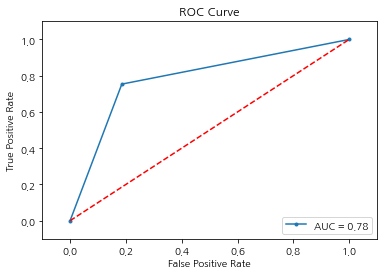

In [34]:
fpr, tpr, _ = roc_curve(y_valid, y_pred_lgs)
auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, marker='.', label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance
# scores lie (i.e. just flipping a coin)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()


### Submit

In [35]:
X_testset = vectorizer.transform(test['cleaned_text']).todense()


In [36]:
print(X_testset.shape)


(3263, 9444)


In [37]:
y_test_pred = lgs.predict(X_testset)


In [38]:
import numpy as np
y_test_pred = np.where(y_test_pred >= 0.5, 1, 0)
y_test_pred


array([1, 0, 1, ..., 1, 1, 1])

In [39]:
submission_file = pd.DataFrame({'id': test_id, 'target': y_test_pred})
submission_file

id  target
0         0       1
1         2       0
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       0
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       1

[3263 rows x 2 columns]

In [40]:
submission_file.to_csv('submission_lgs_20211229_2.csv', index=False)


## Evaluation

### Confusion Metrics (ÌòºÎèô ÌñâÎ†¨)


![](https://blog.kakaocdn.net/dn/bYy2ck/btqyuEJMtta/3qkcbPk3rQiic6J7mHVWQ0/img.png)

- True Positive(TP): Î™®ÌòïÏùÄ ÏïîÏù¥Îã§ ÏòàÏ∏°, Ïã§Ï†úÎ°úÎèÑ ÏïîÏù¥ÏóàÏùå
- True Negative(TN): Î™®ÌòïÏùÄ ÏïîÏù¥ ÏïÑÎãàÎã§ ÏòàÏ∏°, Ïã§Ï†úÎ°úÎèÑ ÏïîÏù¥ ÏïÑÎãàÏóàÏùå
- False Positive(FP): Î™®ÌòïÏùÄ ÏïîÏù¥Îã§ ÏòàÏ∏°, Ïã§Ï†úÎ°úÎäî ÏïÑÎãàÏóàÏùå
- False Negative(FN): Î™®ÌòïÏùÄ ÏïîÏù¥ ÏïÑÎãàÎã§ ÏòàÏ∏°, Ïã§Ï†úÎ°úÎäî ÏïîÏù¥ÏóàÏùå


In [41]:
# Ï∞∏ ÏñëÏÑ±
def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

# Ï∞∏ ÏùåÏÑ±
def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn

# Í∏çÏ†ï Ïò§Î•ò
def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

# Î∂ÄÏ†ï Ïò§Î•ò
def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn


y_true = [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
y_pred = [0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

print("True Negative {}".format(true_negative(y_true, y_pred)))
print("False Positive {}".format(false_positive(y_true, y_pred)))
print("False Negative {}".format(false_negative(y_true, y_pred)))
print("True Positive {}".format(true_positive(y_true, y_pred)))


True Negative 4
False Positive 1
False Negative 3
True Positive 2


- 1ÏùÄ ÏñëÏÑ±ÏùÑ ÏùòÎØ∏, 0ÏùÄ ÏùåÏÑ±ÏùÑ ÏùòÎØ∏ÌïúÎã§Í≥† Í∞ÄÏ†ï
- Ïã§Ï†ØÍ∞íÏù¥ 1Ïùº Îïå ÏòàÏ∏°Í∞íÏù¥ 1Ïù∏ Í≤ΩÏö∞Îäî 2Î≤à
- Ïã§Ï†ØÍ∞íÏù¥ 0Ïùº Îïå ÏòàÏ∏°Í∞íÏù¥ 0Ïù∏ Í≤ΩÏö∞Îäî 4Î≤à

In [42]:
# confusion_matrix() API
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [3, 2]], dtype=int64)

In [43]:
# Tuple ÌòïÌÉúÎ°ú Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp


(4, 1, 3, 2)

### Ï†ïÌôïÎèÑ (Accuracy)
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º Ïã§Ï†ØÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏù¥ ÎèôÏùºÌïú Í∞úÏàòÎ°ú ÎÇòÎàà ÎπÑÏú®

In [44]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)

  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score


print(round(accuracy_v2(y_true, y_pred), 2))


0.6


#### Precision (Ï†ïÎ∞ÄÎèÑ)
- Ï¥ù 100Í∞úÏùò Ïù¥ÎØ∏ÏßÄ
- 90Í∞úÎäî Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ / 10Í∞úÎäî ÏïîÏßÑÎã® Ïù¥ÎØ∏ÏßÄ
+ Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ Ï§ë 80Í∞úÎäî Ï†ïÏÉÅÏúºÎ°ú ÏòàÏ∏°, 10Í∞úÎäî ÏïîÏúºÎ°ú ÏòàÏ∏°(Ïò§Î•ò)
+ Ïïî ÏßÑÎã® Ïù¥ÎØ∏ÏßÄ Ï§ë 8Í∞úÎäî ÏïîÏúºÎ°ú ÏòàÏ∏°, 2Í∞úÎäî Ï†ïÏÉÅÏúºÎ°ú ÏòàÏ∏°(Ïò§Î•ò)
- Í≥ÑÏÇ∞ÌïòÎ©¥, Îã§ÏùåÍ≥º Í∞ôÎã§.
+ TP: 8Í∞ú
+ TN: 80Í∞ú
+ FP: 10Í∞ú
+ FN: 2Í∞ú

![](https://blog.kakaocdn.net/dn/bYy2ck/btqyuEJMtta/3qkcbPk3rQiic6J7mHVWQ0/img.png)

- Precision = TP / (TP + FP)
+ Î™®ÌòïÏù¥ ÏñëÏÑ±Ïù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤É Ï§ëÏóêÏÑú, Ïã§Ï†úÎ°ú ÏñëÏÑ±Ïù∏ Í≤É
+ ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú Í≤É Ï§ëÏóêÏÑú Ïã§Ï†úÎ°ú ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú ÎπÑÏú®ÏùÄ 8 / (8 + 10) = 0.444
+ PrecisionÏùÑ Ïò¨Î¶¨Í∏∞ ÏúÑÌï¥ÏÑúÎäî TPÎ•º Ïò¨Î¶¨Í±∞ÎÇò FPÎ•º ÎÇ¥Î†§Ïïº Ìï®
+ ÏòàÏ∏° ÏÑ±Îä•Ïùò Î™®Îç∏Ïùò ÏûÖÏû•ÏóêÏÑú Î≥¥Îäî Í≤É


In [45]:
from sklearn.metrics import precision_score


def precision(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)

  precision = tp / (tp + fp)
  return precision


print("user function:", precision(y_true, y_pred))
print("scikit-learn function:", precision_score(y_true, y_pred))


user function: 0.6666666666666666
scikit-learn function: 0.6666666666666666


#### Recall (Ïû¨ÌòÑÏú®)
- Ïã§Ï†ú ÏñëÏÑ± Ï§ëÏóêÏÑú, Î™®Îç∏Ïù¥ ÏñëÏÑ±Ïù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤É
- Recall = TP / (TP + FN) = 8 / (8 + 2)


In [46]:
from sklearn.metrics import recall_score


def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)

  recall = tp / (tp + fn)
  return recall


print("user function:", recall(y_true, y_pred))
print("scikit-learn function:", recall_score(y_true, y_pred))


user function: 0.4
scikit-learn function: 0.4


- Ï¢ãÏùÄ Î™®Îç∏ÏùÄ Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïù¥ Î™®Îëê ÎÜíÏïÑÏïº ÌïúÎã§.

#### Threshold
- Î∂ÑÎ•òÎäî Î≥¥ÌÜµ ÌôïÎ•†Í∞íÏúºÎ°ú Ïö∞ÏÑ† Î®ºÏ†Ä Îñ®Ïñ¥ÏßÄÍ≥†, Í∑∏ Îã§ÏùåÏóê ÏûÑÍ≥ÑÍ∞íÏùÑ Ï†ïÌïúÎã§.
- DefaultÎäî Î≥¥ÌÜµ 0.5Ïù¥Îã§.


In [47]:
import numpy as np
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = np.random.rand(20)
print(y_pred)

len(y_true), len(y_pred)


[0.42292573 0.0447443  0.00296723 0.2829075  0.56826865 0.80625444
 0.66496487 0.27723196 0.90349325 0.36529175 0.97800972 0.4737312
 0.7630103  0.31268294 0.94067651 0.66300552 0.68877008 0.51362966
 0.41484018 0.11193335]


(20, 20)

In [48]:
# Í∞Å thresholdÏùò Í∞íÏóê Îî∞Îùº Ïû¨ÌòÑÏú®Í≥º Ï†ïÎ∞ÄÎèÑÍ∞Ä Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ ÌôïÏù∏

import matplotlib.pyplot as plt
import pandas as pd

precisions = []
recalls = []

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)

  precisions.append(p)
  recalls.append(r)

print(pd.DataFrame({"threshold": thresholds,
      "Precision": precisions, "Recall": recalls}))



   threshold  Precision    Recall
0        0.1   0.166667  1.000000
1        0.2   0.176471  1.000000
2        0.3   0.133333  0.666667
3        0.4   0.153846  0.666667
4        0.5   0.100000  0.333333
5        0.6   0.125000  0.333333
6        0.7   0.200000  0.333333
7        0.8   0.250000  0.333333
8        0.9   0.333333  0.333333


<ipython-input-49-3af6f7d106c7>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


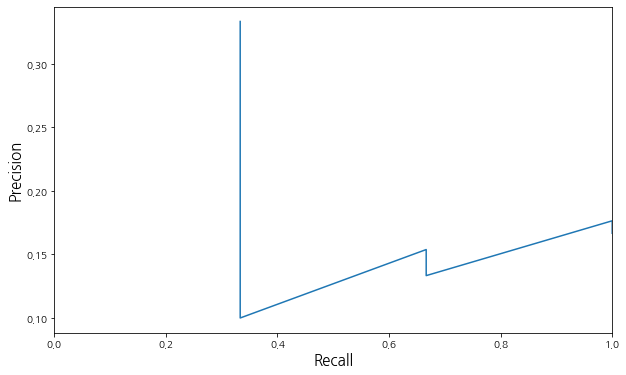

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(recalls, precisions)
ax.set_xlabel('Recall', fontsize=15)
ax.set_ylabel('Precision', fontsize=15)
ax.set_xlim(0, 1.0)
fig.show()


> ÏûÑÍ≥ÑÍ∞íÏùÑ Ïñ¥ÎñªÍ≤å ÏÑ§Ï†ïÌïòÎäêÎÉêÏóê Îî∞Îùº Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò Í∞íÏù¥ Îã¨ÎùºÏßÑÎã§.
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall


#### F1 Score
- Precision & RecallÏùò Í∞ÄÏ§ë ÌèâÍ∑†(Weighted Average)
- P: Precision(Ï†ïÎ∞ÄÎèÑ)
- R: Recall(Ïû¨ÌòÑÏú®)
- Í≥µÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.
+ F1 = 2PR / (P + R)
+ F1 = 2TP / (2TP + FP + FN)


In [53]:
def f1(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  score = 2 * p * r / (p + r)
  return score

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)


0.5714285714285715

In [54]:
from sklearn import metrics
print(metrics.f1_score(y_true, y_pred))

0.5714285714285715


- Ï¢ÖÏÜçÎ≥ÄÏàòÏùò ÎùºÎ≤®Ïù¥ Ï£ºÎ°ú Î∂àÍ∑†ÌòïÏùÑ Ïù¥Î£∞ ÎïåÏóêÎäî Accuracy Î≥¥Îã§Îäî F1 Ïä§ÏΩîÏñ¥Î•º Ï£ºÏöî ÌèâÍ∞Ä ÏßÄÌëúÎ°ú ÏÇºÎäîÎã§.
- F1 Ïä§ÏΩîÏñ¥Í∞Ä 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏Ïù¥ÎùºÍ≥† ÌèâÍ∞ÄÌïúÎã§.


### ROC Í≥°ÏÑ†Í≥º AUC

In [58]:
# AUC
def tpr(y_true, y_pred):
  return recall(y_true, y_pred)


def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)


    threshold  fpr  tpr
0        0.00  1.0  1.0
1        0.10  0.9  1.0
2        0.20  0.7  1.0
3        0.30  0.6  0.8
4        0.40  0.3  0.8
5        0.50  0.3  0.8
6        0.60  0.2  0.8
7        0.70  0.1  0.6
8        0.80  0.1  0.6
9        0.85  0.1  0.4
10       0.90  0.0  0.4
11       0.99  0.0  0.2
12       1.00  0.0  0.0


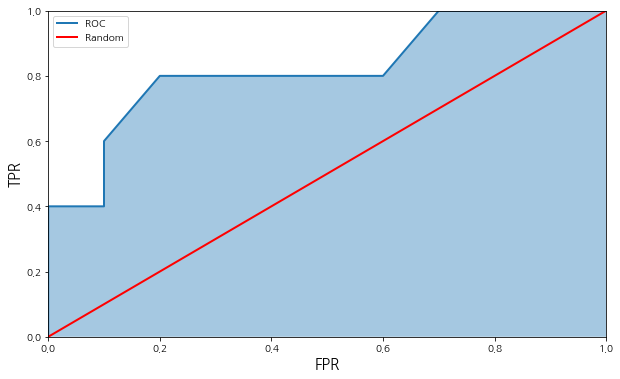

In [59]:
# ROC
import pandas as pd
import matplotlib.pyplot as plt

tpr_list = []
fpr_list = []
auc_list = []

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9,
          0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]


for thresh in thresholds:
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  temp_tpr = tpr(y_true, temp_pred)
  temp_fpr = fpr(y_true, temp_pred)
  temp_fpr = round(temp_fpr, 1)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

print(pd.DataFrame({"threshold": thresholds,
                    "fpr": fpr_list,
                    "tpr": tpr_list}))

fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(fpr_list, tpr_list, alpha=0.4)
ax.plot(fpr_list, tpr_list, lw=2, label='ROC')
plt.plot([0, 1], [0, 1], lw=2, color='r', label='Random')
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel("FPR", fontsize=15)
ax.set_ylabel("TPR", fontsize=15)
plt.legend()
plt.show()


In [60]:
from sklearn.metrics import roc_auc_score

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9,
          0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

print("AUC:", roc_auc_score(y_true, y_pred))


AUC: 0.8300000000000001


- AUCÏóê Í¥ÄÌïú Í≤∞Í≥º Ìï¥ÏÑù
 + AUC = 1.0: Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏
 + AUC = 0.5: ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú, Ïù∏Í∞ÑÏù¥ ÏßÅÏ†ë Î∂ÑÎ•òÌïòÎäî Í≤ÉÍ≥º Ï∞®Ïù¥Í∞Ä ÏóÜÍ±∞ÎÇò Îçî Î™ªÌïú Í≤ΩÏö∞
 + AUC = 0.0: Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÌïôÏäµÏóê Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏¥ Í≤É
